# 1.1 - Load and Inspect the Stroke Dataset

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np

In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)

In [3]:
# Load the raw stroke dataset (adjust path if needed)
data = "F:\\stroke-prediction-project\\data\\raw\\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data)

In [4]:
# -----------------------------
# Preview the data
# -----------------------------
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Check the shape (rows x columns)
print(f"\n Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")


 Dataset shape: 5110 rows × 12 columns


In [6]:
# -----------------------------
# Check data types and non-null counts
# -----------------------------
print("\n Dataset info:")
df.info()


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# -----------------------------
# Check for missing values
# -----------------------------
print("\n Missing values per column:")
print(df.isnull().sum())


 Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
# -----------------------------
# Check for duplicate rows
# -----------------------------
duplicates = df.duplicated()
print(f"\n Number of duplicate rows: {duplicates.sum()}")


 Number of duplicate rows: 0


In [9]:
# Optionally drop duplicates if found
if duplicates.sum() > 0:
    df = df.drop_duplicates()
    print("Duplicates dropped. New shape:", df.shape)

In [10]:
# -----------------------------
# Quick statistical summary of numeric columns
# -----------------------------
print("\n Summary statistics for numerical columns:")
display(df.describe())


 Summary statistics for numerical columns:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 1.2 - Visualize Key Features + Stratified Train-Test Split

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import os

In [12]:
# Set your color palette (easy to change hex codes)
color_age = "#3498db"       # Blue
color_bmi = "#2ecc71"       # Green
color_glucose = "#e67e22"   # Orange
color_target = "#e74c3c"    # Red

In [13]:
# Load raw dataset
data = "F:\\stroke-prediction-project\\data\\raw\\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data)

In [14]:
# ----------------------------
# Drop ID (no predictive value)
# ----------------------------
df.drop(columns=['id'], inplace=True)

In [15]:
# ----------------------------
# Handle missing BMI with median
# ----------------------------
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Program Files\KMSpico\temp\ipykernel_26280\2410844250.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


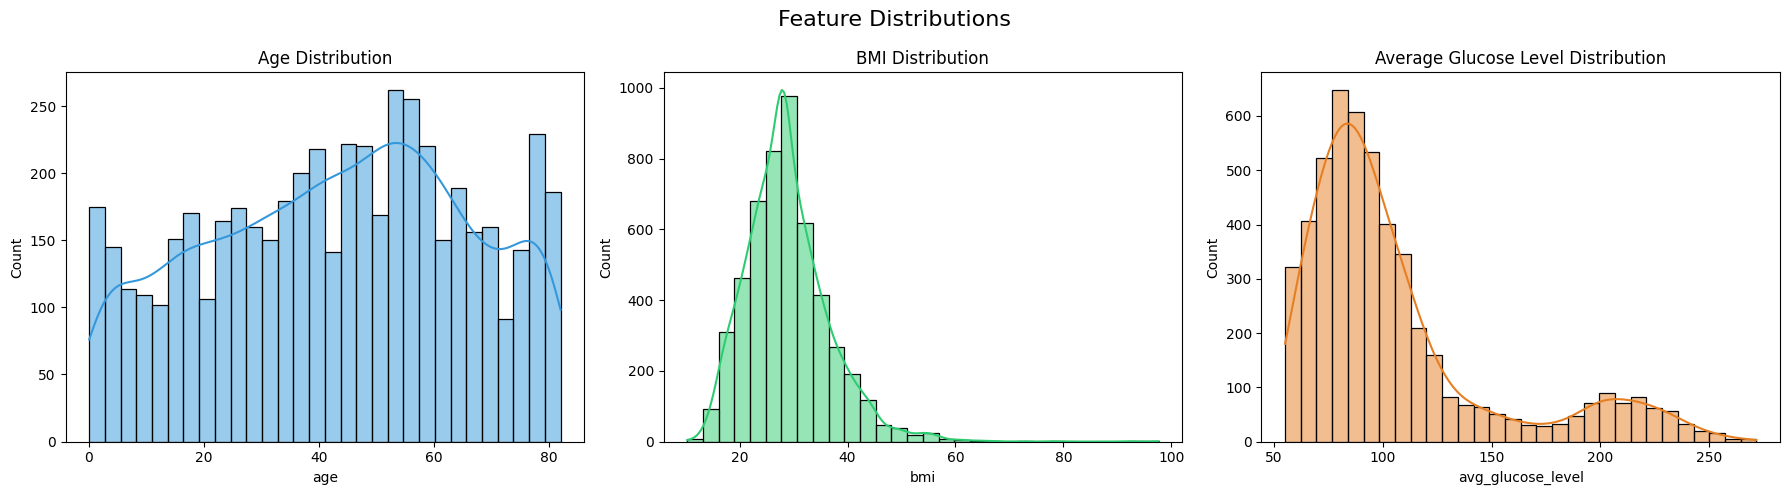

In [16]:
# ----------------------------
# Visualize distributions
# ----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['age'], bins=30, color=color_age, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['bmi'], bins=30, color=color_bmi, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

sns.histplot(df['avg_glucose_level'], bins=30, color=color_glucose, kde=True, ax=axes[2])
axes[2].set_title('Average Glucose Level Distribution')

plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

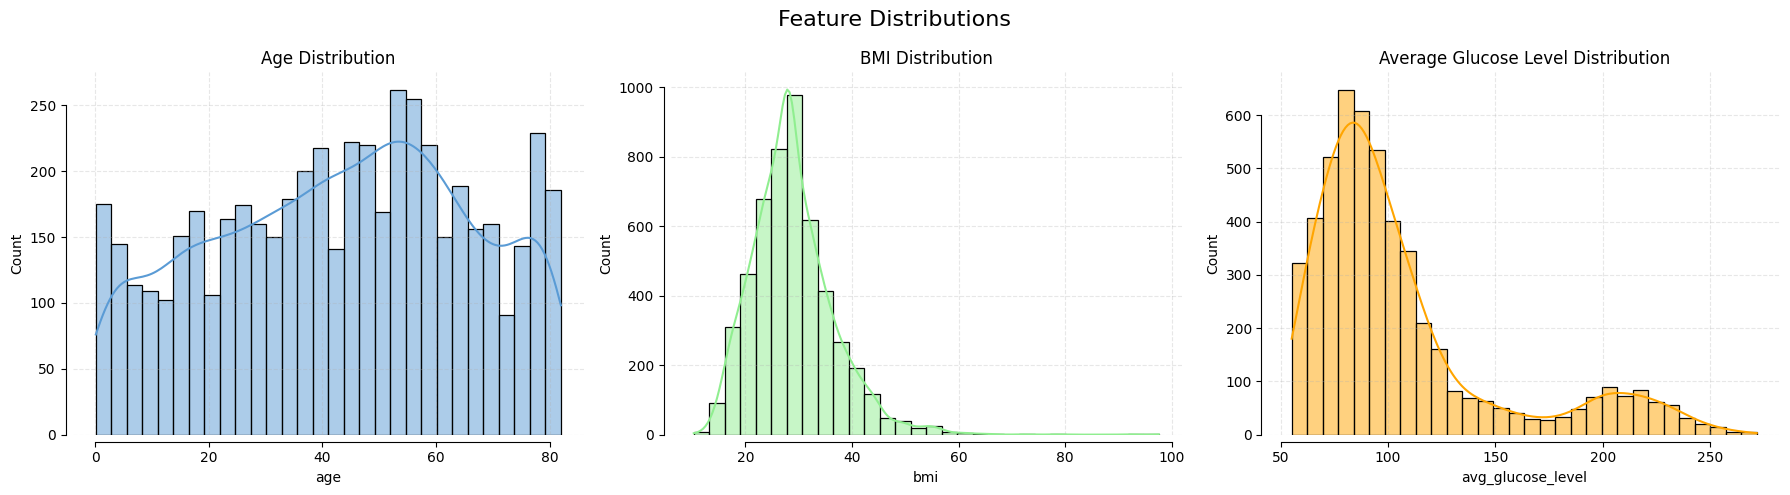

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
color_age = "#5A9BD5"  # Blue
color_bmi = "#90EE90"  # Green
color_glucose = "#FFA500"  # Orange

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Age Distribution
sns.histplot(df['age'], bins=30, color=color_age, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].grid(True, linestyle='--', alpha=0.3)
sns.despine(ax=axes[0], offset=5, trim=True)

# # Highlight key observation
# axes[0].annotate(
#     'Peak at ~50',
#     xy=(50, 250),  # Adjust coordinates based on your data
#     xytext=(55, 300),
#     arrowprops=dict(facecolor='black', arrowstyle='->'),
#     fontsize=10
# )

# Plot BMI Distribution
sns.histplot(df['bmi'], bins=30, color=color_bmi, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].grid(True, linestyle='--', alpha=0.3)
sns.despine(ax=axes[1], offset=5, trim=True)

# # Highlight key observation
# axes[1].annotate(
#     'Peak at ~25',
#     xy=(25, 100),  # Adjust coordinates based on your data
#     xytext=(30, 120),
#     arrowprops=dict(facecolor='black', arrowstyle='->'),
#     fontsize=10
# )

# Plot Average Glucose Level Distribution
sns.histplot(df['avg_glucose_level'], bins=30, color=color_glucose, kde=True, ax=axes[2])
axes[2].set_title('Average Glucose Level Distribution')
axes[2].grid(True, linestyle='--', alpha=0.3)
sns.despine(ax=axes[2], offset=5, trim=True)

# # Highlight key observation
# axes[2].annotate(
#     'Peak at ~100',
#     xy=(100, 600),  # Adjust coordinates based on your data
#     xytext=(110, 650),
#     arrowprops=dict(facecolor='black', arrowstyle='->'),
#     fontsize=10
# )

# Add overall title
plt.suptitle('Feature Distributions', fontsize=16)

# Adjust layout
plt.tight_layout()

# Save the figure
output_dir = r"F:\stroke-prediction-project\figures"
os.makedirs(output_dir, exist_ok=True)

pdf_path = os.path.join(output_dir, "feature_distributions.pdf")
png_path = os.path.join(output_dir, "feature_distributions.png")

plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.savefig(png_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [17]:
# ----------------------------
# Skewness of numerical features
# ----------------------------
print("\nSkewness:")
print(f"Age: {df['age'].skew():.2f}")
print(f"BMI: {df['bmi'].skew():.2f}")
print(f"Avg Glucose Level: {df['avg_glucose_level'].skew():.2f}")


Skewness:
Age: -0.14
BMI: 1.09
Avg Glucose Level: 1.57


C:\Program Files\KMSpico\temp\ipykernel_26280\3357993692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette=[color_target, '#95a5a6'])


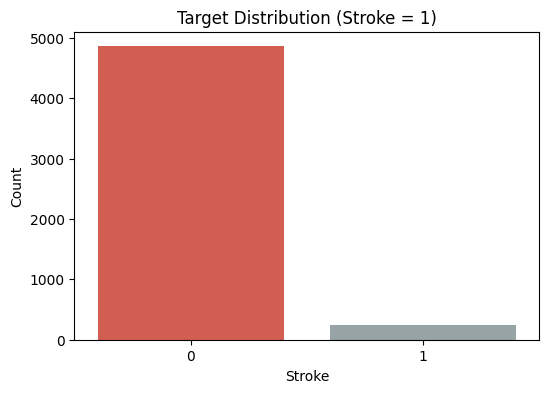


Stroke = 1 accounts for only 4.87% of the dataset


In [18]:
# ----------------------------
# Stroke (target) distribution
# ----------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette=[color_target, '#95a5a6'])
plt.title('Target Distribution (Stroke = 1)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

stroke_rate = df['stroke'].value_counts(normalize=True) * 100
print(f"\nStroke = 1 accounts for only {stroke_rate[1]:.2f}% of the dataset")

C:\Program Files\KMSpico\temp\ipykernel_17992\455120569.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette=[color_target, color_no_target])



Stroke = 1 accounts for only 4.87% of the dataset


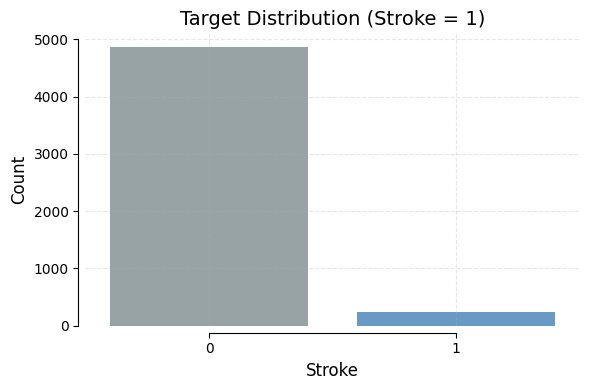

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
color_target = "#95a5a6"  # Red for Stroke = 1
color_no_target = "#5A9BD5"  # Gray for Stroke = 0

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette=[color_target, color_no_target])

# Customize appearance
plt.title('Target Distribution (Stroke = 1)', fontsize=14)
plt.xlabel('Stroke', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine(ax=plt.gca(), offset=5, trim=True)

# Calculate stroke rate
stroke_rate = df['stroke'].value_counts(normalize=True) * 100
print(f"\nStroke = 1 accounts for only {stroke_rate[1]:.2f}% of the dataset")

# Save the figure
output_dir = r"F:\stroke-prediction-project\figures"
os.makedirs(output_dir, exist_ok=True)

pdf_path = os.path.join(output_dir, "target_distribution.pdf")
png_path = os.path.join(output_dir, "target_distribution.png")

plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.savefig(png_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# ----------------------------
# Correlation Matrix Analysis
# ----------------------------
# Calculate correlation matrix (numeric features only)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix (Numerical Features):")
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
# plt.savefig("data/processed/correlation_matrix.png")  # Save the plot
plt.close()  # Close the plot to prevent display if running in script

print("\n✅ Correlation matrix saved to data/processed/correlation_matrix.png")



Correlation Matrix (Numerical Features):
                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.324296      0.158293       0.036916           0.166876   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.324296  0.245257  
hypertension       0.158293  0.127904  
heart_disease      0.036916  0.134914  
avg_glucose_level  0.166876  0.131945  
bmi                1.000000  0.036110  
stroke             0.036110  1.000000  

✅ Correlation matrix saved to data/processed/correlation_matrix.png


C:\Program Files\KMSpico\temp\ipykernel_26280\735284274.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


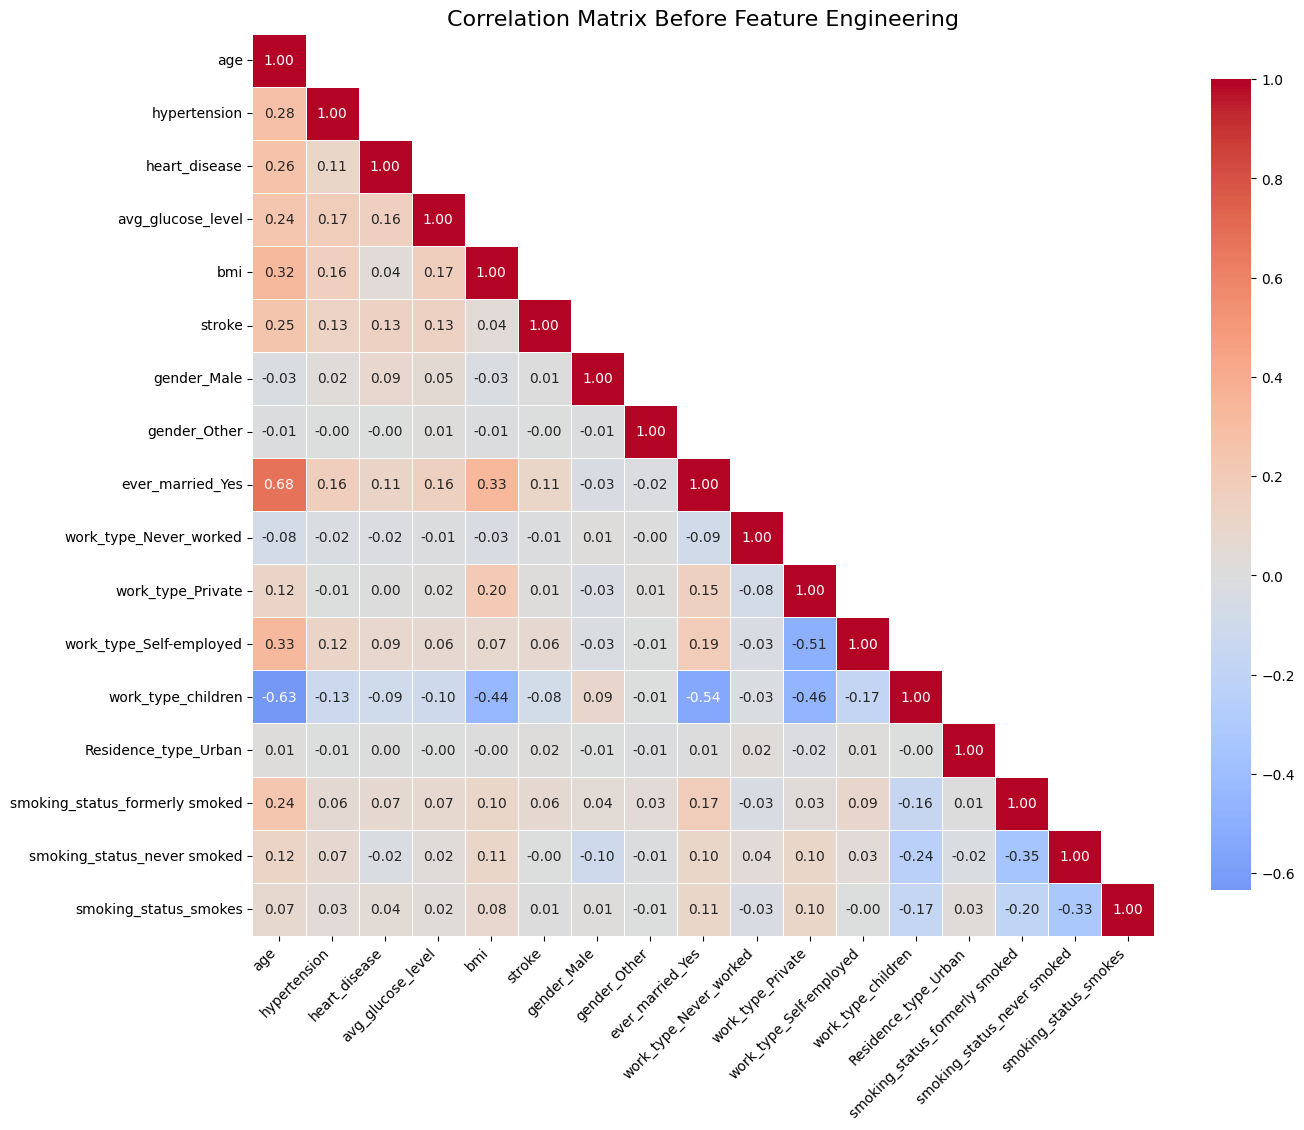

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ── load & prep ───────────────────────────────────────────────────────────────
df = pd.read_csv(r"F:\stroke-prediction-project\data\raw\healthcare-dataset-stroke-data.csv")
df.drop(columns=['id'], inplace=True, errors='ignore')
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# ── encode & clean columns ────────────────────────────────────────────────────
df_encoded = pd.get_dummies(df, drop_first=True)
# strip any stray quotes or spaces from column names
df_encoded.columns = df_encoded.columns.str.strip().str.replace("'", "", regex=False)

# ── compute correlations ──────────────────────────────────────────────────────
corr = df_encoded.corr()

# ── build mask to hide only the upper triangle (k=1) ──────────────────────────
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# ── plot ──────────────────────────────────────────────────────────────────────
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Before Feature Engineering", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# ── save ──────────────────────────────────────────────────────────────────────
out_dir = r"F:\stroke-prediction-project\figures"
plt.savefig(f"{out_dir}/correlation_matrix_before_feature_engineering.png", dpi=300)
plt.savefig(f"{out_dir}/correlation_matrix_before_feature_engineering.pdf", dpi=300)

plt.show()

C:\Program Files\KMSpico\temp\ipykernel_26280\1747980092.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


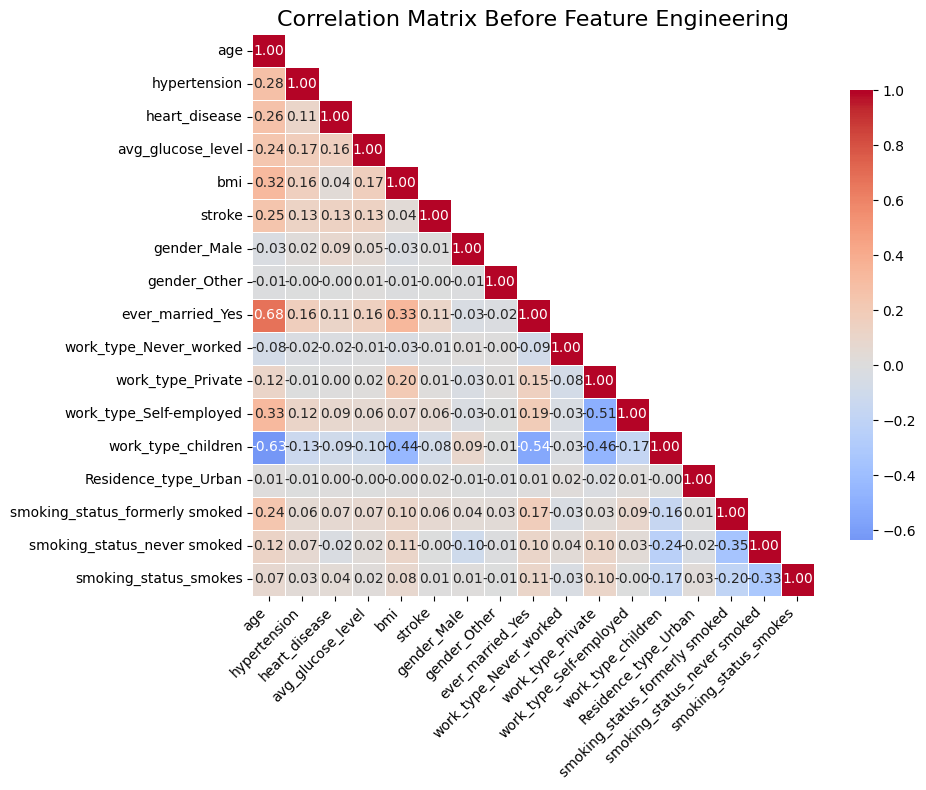

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ── load & prep ───────────────────────────────────────────────────────────────
df = pd.read_csv(r"F:\stroke-prediction-project\data\raw\healthcare-dataset-stroke-data.csv")
df.drop(columns=['id'], inplace=True, errors='ignore')
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# ── encode & clean columns ────────────────────────────────────────────────────
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.strip().str.replace("'", "", regex=False)

# ── compute correlations ──────────────────────────────────────────────────────
corr = df_encoded.corr()

# ── build mask to hide only the upper triangle (k=1) ──────────────────────────
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# ── plot ──────────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 8))                     # ← changed from (14,12) to (10,8)
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Before Feature Engineering", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# ── save ──────────────────────────────────────────────────────────────────────
out_dir = r"F:\stroke-prediction-project\figures"
plt.savefig(f"{out_dir}/correlation_matrix_before_feature_engineering.png", dpi=300)
plt.savefig(f"{out_dir}/correlation_matrix_before_feature_engineering.pdf", dpi=300)

plt.show()

In [11]:
# ----------------------------
# Split Data (Stratified)
# ----------------------------
X = df.drop(columns='stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [12]:
# Recombine for saving
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [13]:
# ----------------------------
# Save to processed folder
# ----------------------------
os.makedirs("data/processed", exist_ok=True)
train_df.to_csv("data/processed/train.csv", index=False)
test_df.to_csv("data/processed/test.csv", index=False)

print("\n✅ Stratified train/test split completed and saved.")
print(f"Train shape: {train_df.shape} | Stroke %: {train_df.stroke.mean():.3f}")
print(f"Test shape:  {test_df.shape} | Stroke %: {test_df.stroke.mean():.3f}")


✅ Stratified train/test split completed and saved.
Train shape: (4088, 11) | Stroke %: 0.049
Test shape:  (1022, 11) | Stroke %: 0.049
